In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vgsales = pd.read_csv('/content/drive/MyDrive/EDA/Video game sales project/vgsales.csv')

In [ ]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
vgsales.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
vgsales['Publisher'] = vgsales['Publisher'].fillna('Unknown')

In [ ]:
vgsales.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
vgsales[vgsales['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
vgsales_sort = vgsales.sort_values(by='Year').reset_index(drop=True)
vgsales_sort['Year'] = vgsales_sort['Year'].interpolate()
vgsales['Year'] = vgsales_sort['Year']

In [ ]:
vgsales.to_csv('vgsales_cleaned.csv', index = False)

In [ ]:
vgsales.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# **The Gaming Industry**

---



# **Statistical analysis**




---



In [ ]:
!pip install scipy
from scipy.stats import pearsonr

## **Correlation Analysis: Year Of Release Vs. Global Sales**


---



Perform hypothesis testing to determine if there is a significant correlation between the year of release and global sales.

H0 : There is no correlation between the "Year" and "Global_Sales" variables

Ha : There is a significant correlation between the "Year" and "Global_Sales"

The null hypothesis implies that changes in the year of release do not have a systematic effect on global sales, while the alternative hypothesis challenges the null hypothesis and suggests that there is a significant linear correlation between the year of release and global sales.

In [ ]:
# Pearson correlation test
corr_coeff, p_value = pearsonr(vgsales['Year'], vgsales['Global_Sales'])

# Print the correlation coefficient and p-value
print("Pearson Correlation Coefficient:", corr_coeff)
print("p-value:", p_value)

Pearson Correlation Coefficient: -0.6223863046207098
p-value: 0.0


The negative Pearson correlation coefficient of -0.6223863046207098 suggests a moderate to strong negative linear relationship between the two variables.

The p-value of 0.0 indicates that this relationship is statistically significant, providing very strong evidence against the null hypothesis of no correlation.

Thus, we can confidently conclude that there is a significant negative correlation between the two variables in the data analyzed.



# **ANOVA**


---



(Analysis of Variance) test, to analyze if there are significant differences in sales among different publishers.

H0 : There are no significant differences in sales among the different publishers

Ha : The alternative hypothesis challenges the null hypothesis and suggests that at least one pair of publisher means has a significant difference in sales.

In [ ]:
!pip install scipy
import scipy.stats
publisher_sales = {}  # Dictionary to store sales for each publisher
for publisher, sales in vgsales.groupby('Publisher')['Global_Sales']:
    publisher_sales[publisher] = sales.values

# Perform ANOVA test
f_stat, p_value = scipy.stats.f_oneway(*publisher_sales.values())

print("ANOVA Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

ANOVA Results:
F-statistic: 3.4161162581932647
p-value: 1.874410784095322e-139


The F-statistic value is  3.4161.

The p-value is approximately 1.8744e-139 (very close to zero).

Conclusion:

The extremely low p-value (close to zero) suggests strong evidence against the null hypothesis. Therefore, we reject the null hypothesis of equal sales among different publishers. In other words, there are significant differences in sales performance among the publishers included in the analysis.


---



## **Univariate Analysis**

---



## **Sales**

In [ ]:
vgsales.columns = vgsales.columns.str.strip()

print("Total NA sales =", round(vgsales["NA_Sales"].sum(), 2), "Million dollars\n",
      "Total EU sales =", round(vgsales["EU_Sales"].sum(), 2), "Million dollars\n",
      "Total JP sales =", round(vgsales["JP_Sales"].sum(), 2), "Million dollars\n",
      "Total Other regions sales =", round(vgsales["Other_Sales"].sum(), 2) ,"Million dollars\n",
      "and Total Global sales =", round(vgsales["Global_Sales"].sum(), 2), "Million dollars\n")

NApercent = (vgsales["NA_Sales"].sum() / vgsales["Global_Sales"].sum()) * 100
print(NApercent, '%')

Total NA sales = 4392.95 Million dollars
 Total EU sales = 2434.13 Million dollars
 Total JP sales = 1291.02 Million dollars
 Total Other regions sales = 797.75 Million dollars
 and Total Global sales = 8920.44 Million dollars

49.245889216227006 %


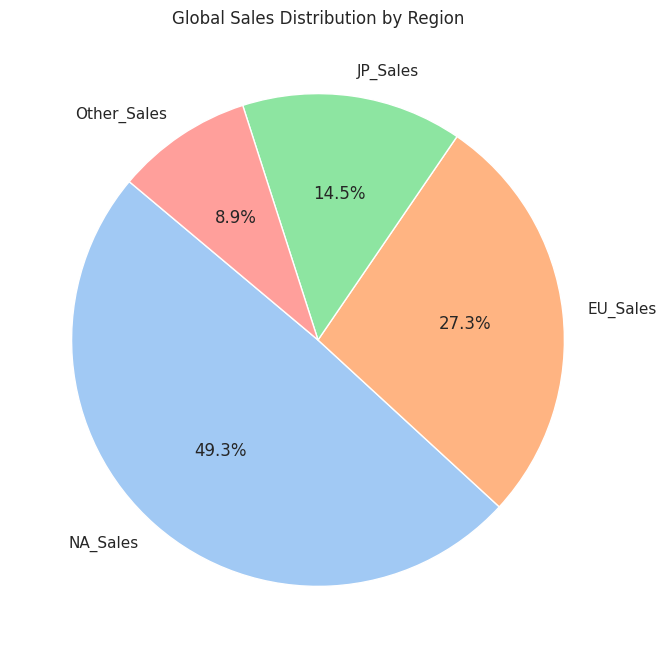

In [ ]:
sales_data = {
    'NA_Sales': vgsales['NA_Sales'].sum(),
    'EU_Sales': vgsales['EU_Sales'].sum(),
    'JP_Sales': vgsales['JP_Sales'].sum(),
    'Other_Sales': vgsales['Other_Sales'].sum()
}

regions = list(sales_data.keys())
sales = list(sales_data.values())

sns.set(style='whitegrid')

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=regions, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Global Sales Distribution by Region')
plt.show()

Insights: Sales

North America ($4392.95 millions) has seen the highest sales worldwide in the video gaming industry and was 49% of Global sales.


---



### **Platform**

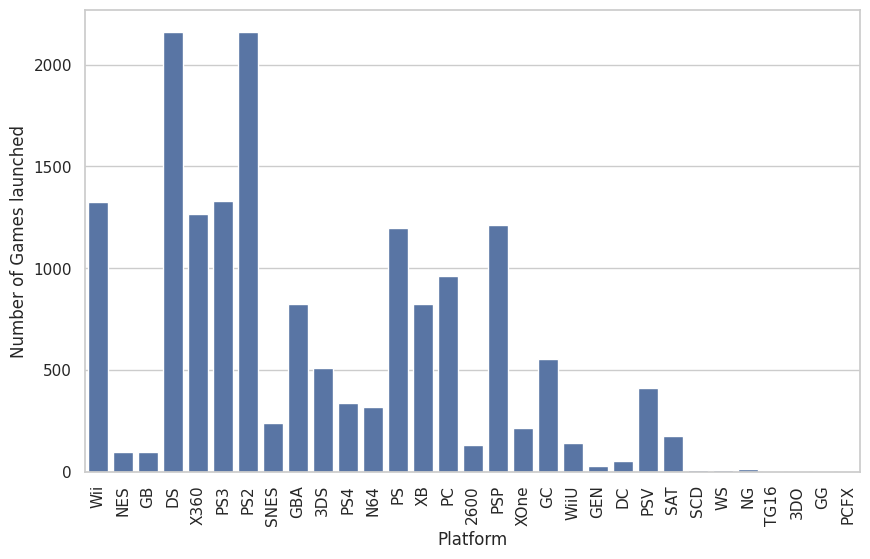

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', data=vgsales)
plt.ylabel('Number of Games launched')
plt.xticks(rotation=90)
plt.show()

In [ ]:
platform_percentages = (vgsales['Platform'].value_counts() / len(vgsales)) * 100
platform_percentages.head(10)

,count
Platform,
DS,13.031691
PS2,13.019641
PS3,8.006989
Wii,7.982890
X360,7.621400
PSP,7.308109
PS,7.205687
PC,5.783829
XB,4.964454


Insights: Platform

The Sony PS2 and Nintendo DS were among the most successful gaming platforms, each contributing 13% to the video gaming industry, indicating strong competition between the two.

The PS3, Wii, Xbox 360, PSP, and PlayStation collectively represent mid-range customer base platforms, together contributing 23.4% to the video gaming industry.

Sony, with its platforms including the PS2, PS3, PSP, and PlayStation, holds a dominant position in the video gaming industry.


---



### **Year**

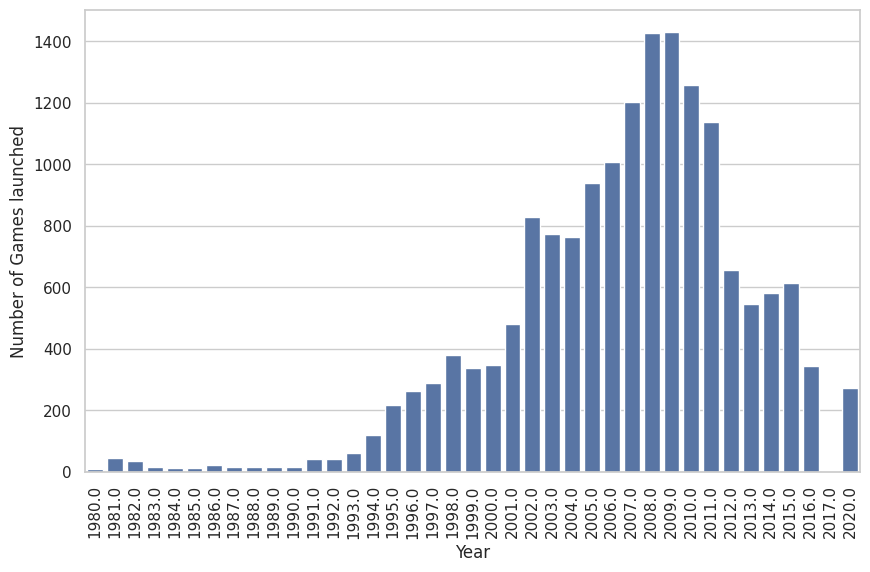

In [ ]:
vgsales = vgsales.sort_values(by='Year')

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=vgsales)
plt.xticks(rotation=90)
plt.ylabel('Number of Games launched')
plt.show()

Insights: Year

The period from 2005 to 2011 saw massive growth in the gaming industry, with 2008 and 2009 standing out as the best performing years.

During the Great Recession of 2008-2009, people stayed home more often, leading to a surge in video game launches aimed at keeping the public engaged.

In 2012, the combination of expensive gaming consoles and the rise of the digital gaming industry led to a decline in the release of new video games.


---



### **Genre**


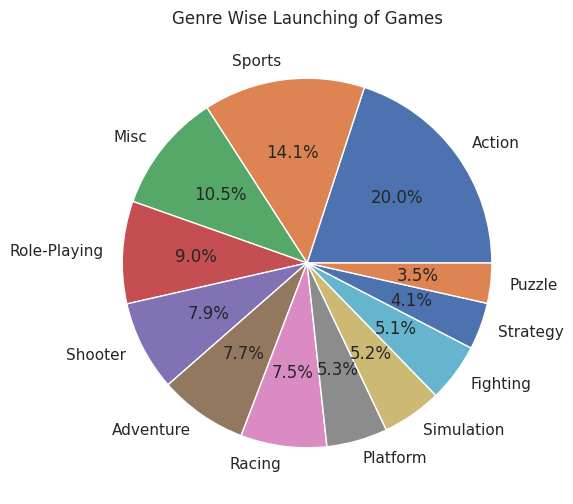

In [ ]:
plt.figure(figsize=(10, 6))
vgsales['Genre'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Genre Wise Launching of Games")
plt.ylabel('')  # Hide the y-label
plt.show()

Insights: Genre

Action and Sports genre covered around 34.1% of the total gaming industry

### **Publisher**

In [ ]:
vgsales['Publisher'].value_counts().head(10)
publishers = (vgsales['Publisher'].value_counts() / len(vgsales)) * 100
top_publishers = publishers.head(10)
top_publishers

,count
Publisher,
Electronic Arts,8.139535
Activision,5.874202
Namco Bandai Games,5.615134
Ubisoft,5.548861
Konami Digital Entertainment,5.012652
THQ,4.307748
Nintendo,4.235450
Sony Computer Entertainment,4.114954
Sega,3.849861


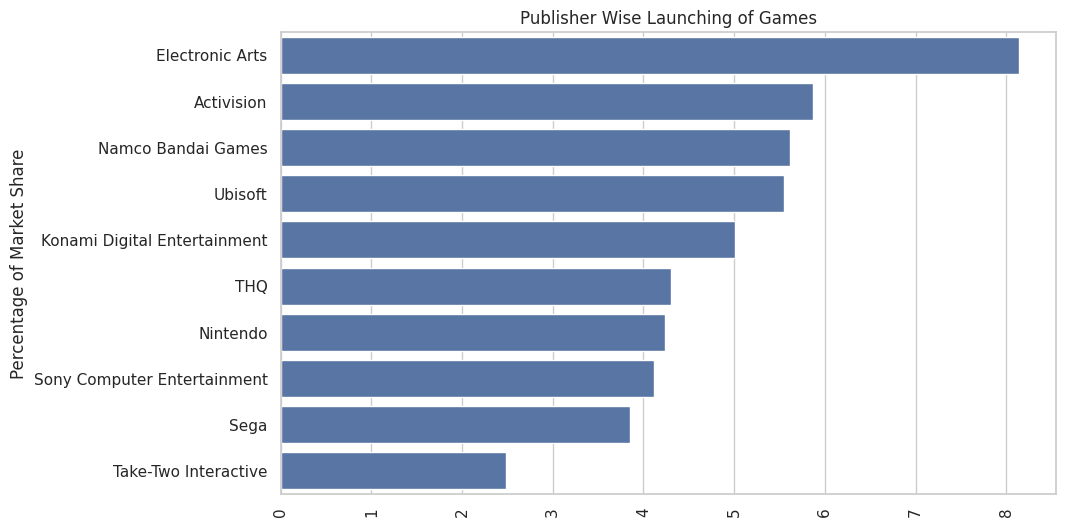

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.xticks(rotation=90)
plt.title("Publisher Wise Launching of Games")
plt.ylabel('Percentage of Market Share')
plt.show()

In [ ]:
top_publishers.cumsum()

,count
Publisher,
Electronic Arts,8.139535
Activision,14.013737
Namco Bandai Games,19.628871
Ubisoft,25.177732
Konami Digital Entertainment,30.190384
THQ,34.498132
Nintendo,38.733582
Sony Computer Entertainment,42.848536
Sega,46.698397


In [ ]:
publishers.head(20).cumsum()

,count
Publisher,
Electronic Arts,8.139535
Activision,14.013737
Namco Bandai Games,19.628871
Ubisoft,25.177732
Konami Digital Entertainment,30.190384
THQ,34.498132
Nintendo,38.733582
Sony Computer Entertainment,42.848536
Sega,46.698397


Insights: Publisher

The top 10 publisher companies collectively hold a 50% market share of the entire gaming industry.

The next 10 publisher companies together account for only 15% of the gaming industry's market share.

Electronic Arts stands out as the leading publisher in the industry.


---



# **Bivariate Analysis**


---



### **2005 - 2016: Year vs. Platform**

In [ ]:
year_2005 = vgsales[vgsales['Year'] == 2005.0]
year_2006 = vgsales[vgsales['Year'] == 2006.0]
year_2007 = vgsales[vgsales['Year'] == 2007.0]
year_2008 = vgsales[vgsales['Year'] == 2008.0]
year_2009 = vgsales[vgsales['Year'] == 2009.0]
year_2010 = vgsales[vgsales['Year'] == 2010.0]
year_2011 = vgsales[vgsales['Year'] == 2011.0]
year_2012 = vgsales[vgsales['Year'] == 2012.0]
year_2013 = vgsales[vgsales['Year'] == 2013.0]
year_2014 = vgsales[vgsales['Year'] == 2014.0]
year_2015 = vgsales[vgsales['Year'] == 2015.0]
year_2016 = vgsales[vgsales['Year'] == 2016.0]

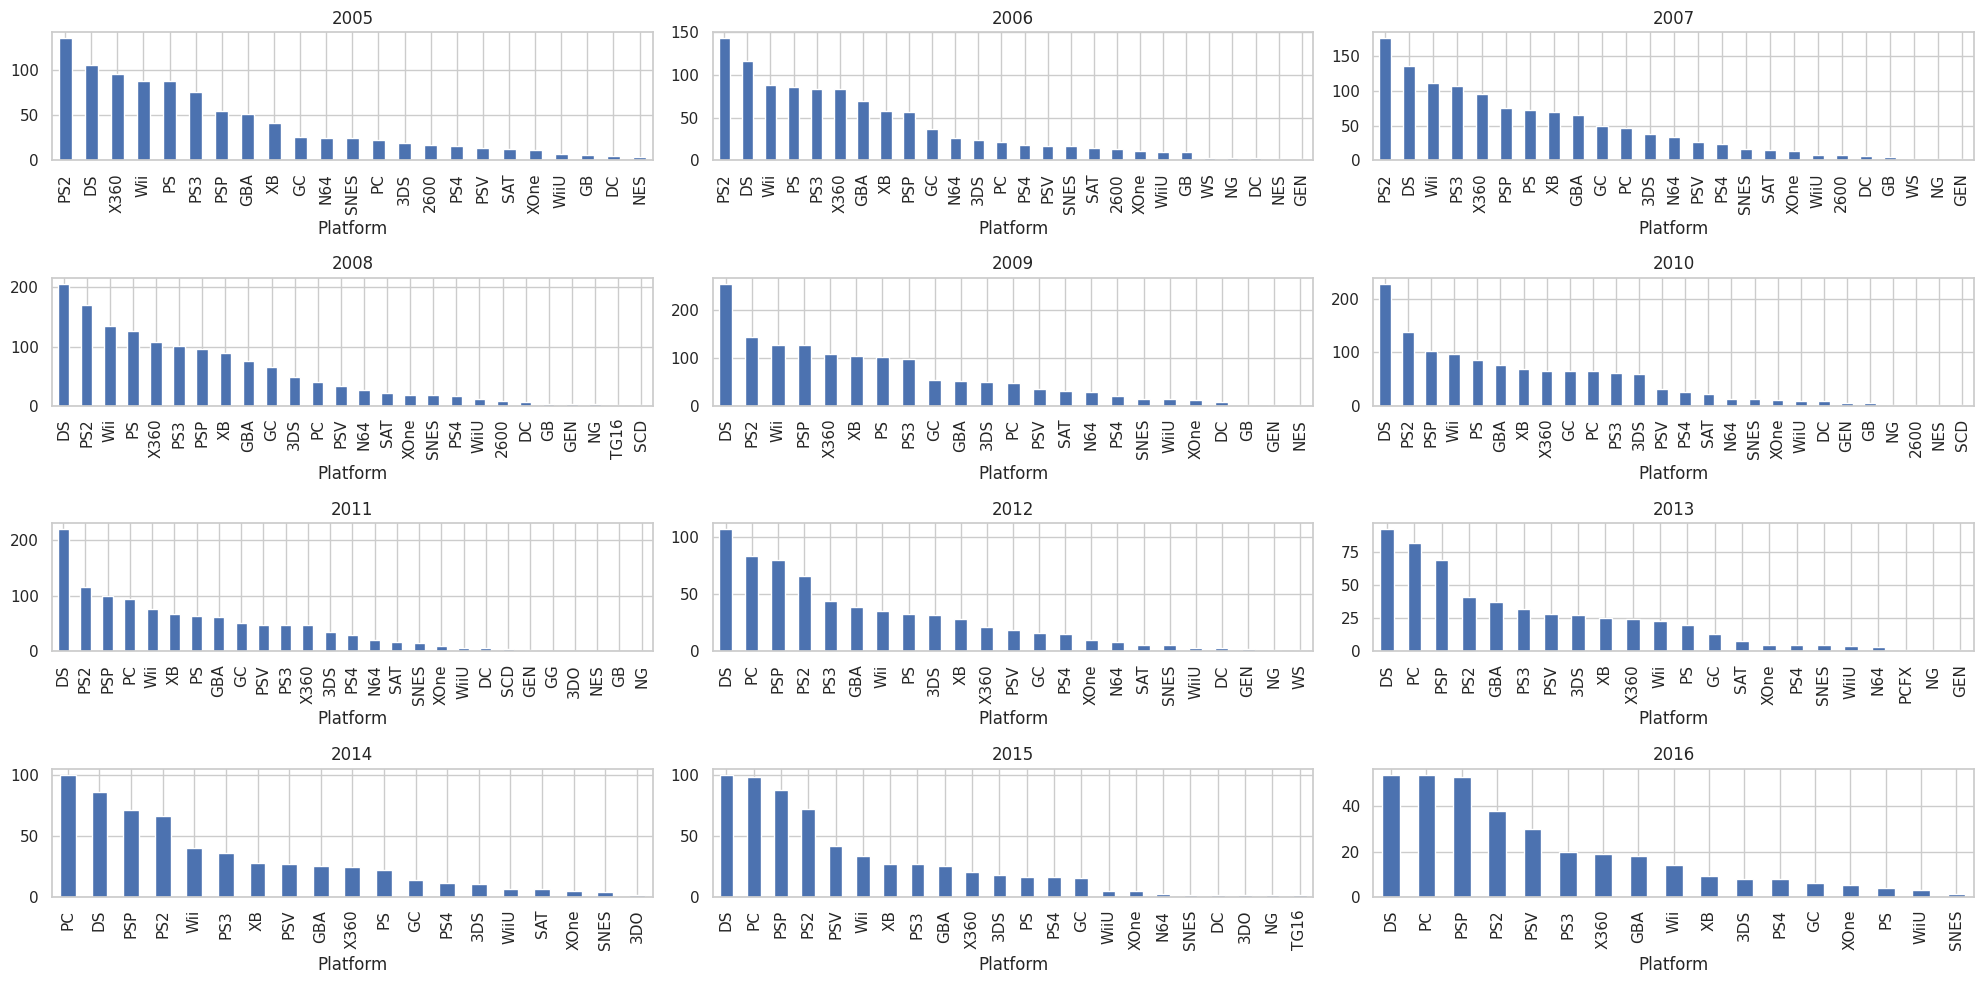

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(20, 10))
years = [year_2005, year_2006, year_2007, year_2008, year_2009, year_2010, year_2011, year_2012, year_2013, year_2014, year_2015, year_2016]
titles = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
axs = axs.flatten()
for i in range(len(years)):
    years[i]['Platform'].value_counts().plot(kind='bar', ax=axs[i], title=titles[i])
plt.tight_layout()
plt.show()

### **Insights:**

**Dominance of DS and PS2:**

DS and PS2 appear frequently at the top of the charts from 2005 to around 2011. This indicates their popularity and significant market share during these years.

**Rise of New Platforms:**

From 2008 onwards, there is a notable presence of newer platforms like Wii, PS3, and Xbox 360. These platforms gain significant traction, indicating a shift in gaming preferences and technological advancements.

**Decline of Older Platforms:**

Platforms such as GBA, N64, and SNES, which were once popular, gradually lose their standing and are almost non-existent in the top positions after 2010.


The data shows the dynamic nature of the gaming industry, with different platforms rising and falling in popularity over the years. The early 2000s were dominated by consoles like PS2 and DS, while the later years saw the rise of newer consoles like PS3, Xbox 360, and eventually PS4 and Xbox One. The consistent presence of the DS highlights its significant impact, while the increasing presence of PC gaming towards the later years shows a shift in gaming preferences.


---



## **Platform vs. Sales (millions)**

In [ ]:
platform_sales_na = vgsales.groupby('Platform')['NA_Sales'].sum().reset_index()
top_10_platform_na = platform_sales_na.sort_values(by='NA_Sales', ascending=False).head(10)
print(top_10_platform_na)

platform_sales_eu = vgsales.groupby('Platform')['EU_Sales'].sum().reset_index()
top_10_platform_eu = platform_sales_eu.sort_values(by='EU_Sales', ascending=False).head(10)
print(top_10_platform_eu)

platform_sales_jp = vgsales.groupby('Platform')['JP_Sales'].sum().reset_index()
top_10_platform_jp = platform_sales_jp.sort_values(by='JP_Sales', ascending=False).head(10)
print(top_10_platform_jp)

platform_sales_other = vgsales.groupby('Platform')['Other_Sales'].sum().reset_index()
top_10_platform_other = platform_sales_other.sort_values(by='Other_Sales', ascending=False).head(10)
print(top_10_platform_other)

platform_sales_global = vgsales.groupby('Platform')['Global_Sales'].sum().reset_index()
top_10_platform_global = platform_sales_global.sort_values(by='Global_Sales', ascending=False).head(10)
print(top_10_platform_global)

   Platform  NA_Sales
28     X360    601.05
16      PS2    583.84
26      Wii    507.71
17      PS3    392.26
4        DS    390.71
15       PS    336.51
6       GBA    187.54
29       XB    186.69
10      N64    139.02
7        GC    133.46
   Platform  EU_Sales
17      PS3    343.71
16      PS2    339.29
28     X360    280.58
26      Wii    268.38
15       PS    213.60
4        DS    194.65
13       PC    139.68
18      PS4    123.70
6       GBA     75.25
19      PSP     68.25
   Platform  JP_Sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
11      NES     98.65
2       3DS     97.35
5        GB     85.12
17      PS3     79.99
19      PSP     76.79
26      Wii     69.35
   Platform  Other_Sales
16      PS2       193.44
17      PS3       141.93
28     X360        85.54
26      Wii        80.61
4        DS        60.53
18      PS4        43.36
19      PSP        42.19
15       PS        40.91
13       PC        24.86
2       3DS        12.63

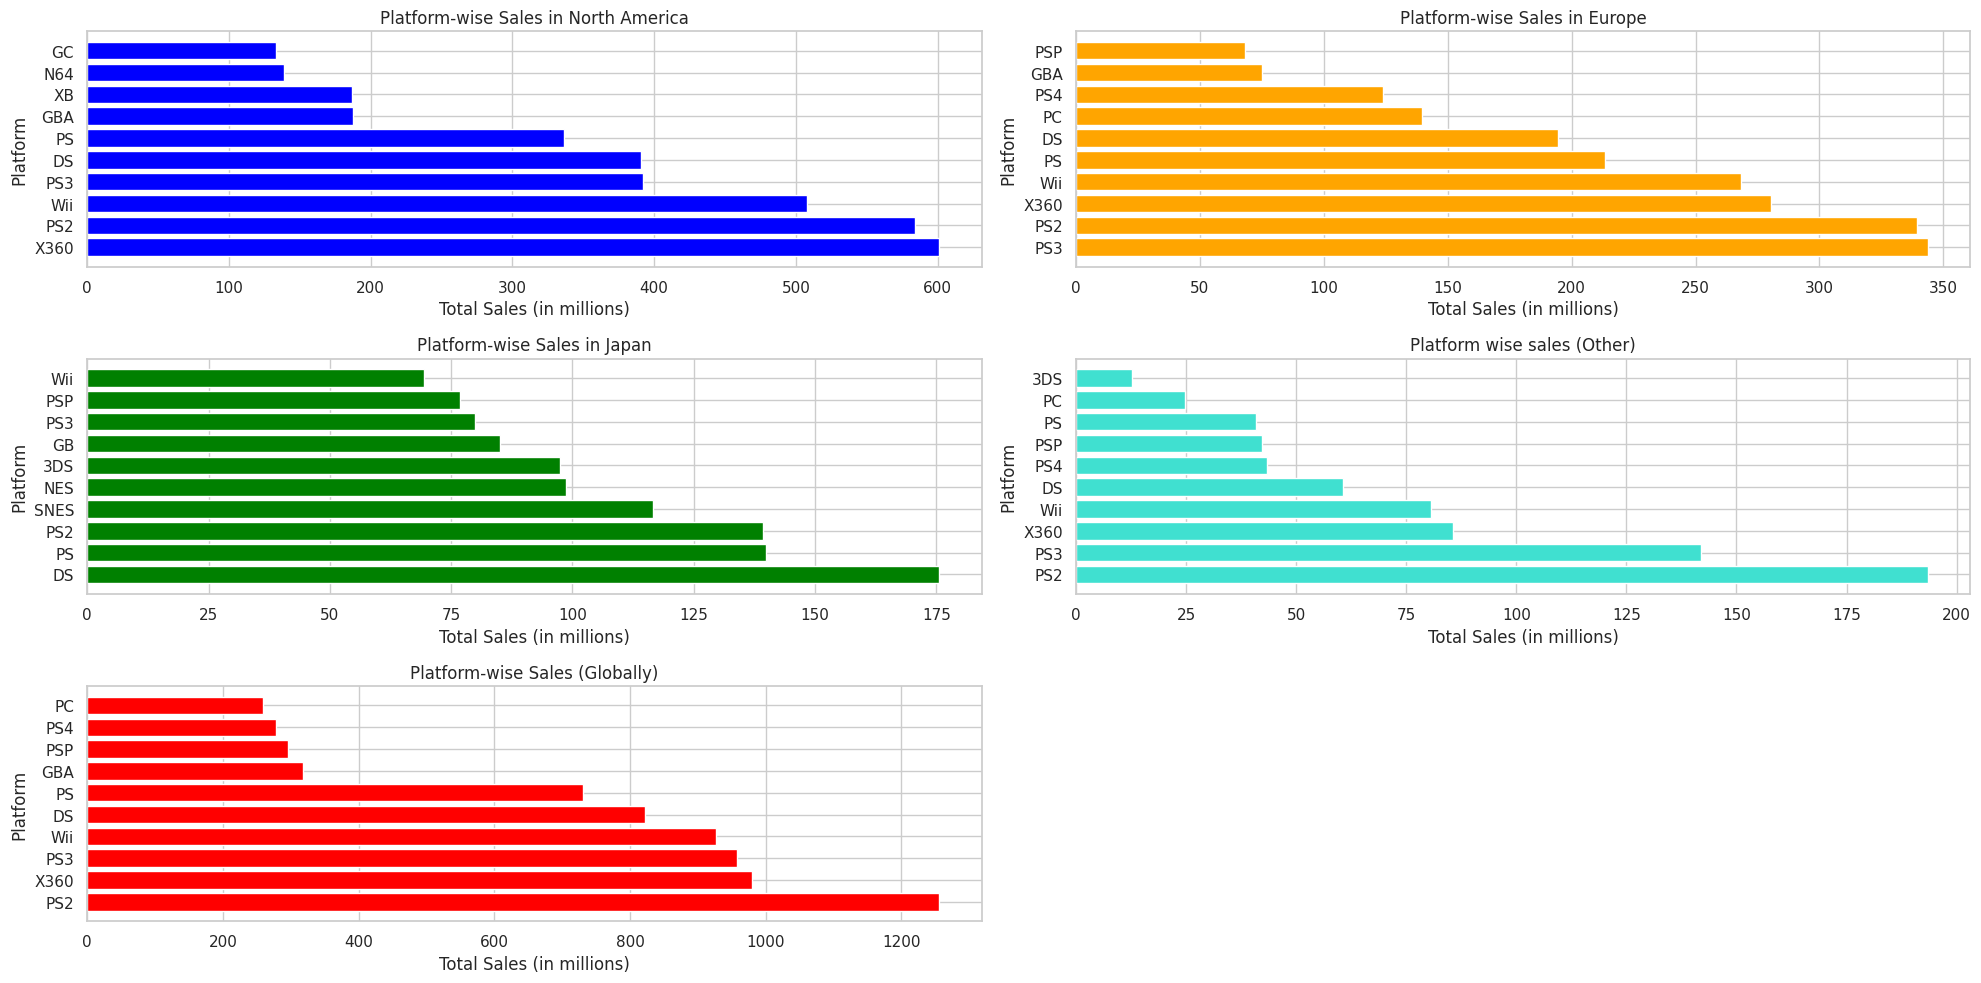

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
platforms = [top_10_platform_na, top_10_platform_eu, top_10_platform_jp, top_10_platform_other, top_10_platform_global]
titles = ['Platform-wise Sales in North America', 'Platform-wise Sales in Europe', 'Platform-wise Sales in Japan', 'Platform wise sales (Other)', 'Platform-wise Sales (Globally)']
colors = ['blue','orange','green','turquoise' , 'red']
axs = axs.flatten()
for i, sub in enumerate(platforms):
    axs[i].barh(sub.iloc[:,0], sub.iloc[:,1], color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Total Sales (in millions)')
    axs[i].set_ylabel('Platform')
fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

**Insights:**

The charts provided show platform-wise sales of gaming consoles in different regions: North America, Europe, Japan, Other regions, and globally. Here are some insights from the data:

### North America
- **Top Platforms:** Xbox 360 (X360), PlayStation 2 (PS2), Wii
- **Sales Range:** The highest sales are around 600 million units (X360), while the lowest are just under 100 million units (GameCube, GC).
- **Popular Platforms:** The Xbox 360 dominates the North American market, followed closely by PS2 and Wii.

### Europe
- **Top Platforms:** PlayStation 3 (PS3), PlayStation 2 (PS2), Xbox 360 (X360)
- **Sales Range:** The highest sales are just under 350 million units (PS3), while the lowest are under 100 million units (PSP).
- **Popular Platforms:** The PlayStation 3 leads the European market, with PS2 and X360 also performing strongly.

### Japan
- **Top Platforms:** Nintendo DS (DS), PlayStation (PS), PlayStation 2 (PS2)
- **Sales Range:** The highest sales are around 175 million units (DS), while the lowest are just under 25 million units (Wii).
- **Popular Platforms:** The Nintendo DS is the most popular in Japan, followed by the original PlayStation and PS2.

### Other Regions
- **Top Platforms:** PlayStation 2 (PS2), PlayStation 3 (PS3), Xbox 360 (X360)
- **Sales Range:** The highest sales are around 200 million units (PS2), while the lowest are just under 25 million units (3DS).
- **Popular Platforms:** The PlayStation 2 dominates other regions, with PS3 and X360 also showing strong sales.

### Global Sales
- **Top Platforms:** PlayStation 2 (PS2), Xbox 360 (X360), PlayStation 3 (PS3)
- **Sales Range:** The highest sales are around 1250 million units (PS2), while the lowest are just over 100 million units (PC).
- **Popular Platforms:** The PlayStation 2 has the highest global sales, followed by the Xbox 360 and PS3.

### General Insights
- **PlayStation 2 (PS2)**: This platform consistently shows high sales across all regions, particularly strong globally.
- **Xbox 360 (X360)**: Performs very well in North America and Europe, also strong globally.
- **Nintendo DS (DS)**: Extremely popular in Japan, with significant sales globally.
- **PlayStation 3 (PS3)**: Strong performance in Europe, other regions, and globally.
- **Wii**: Shows moderate success across all regions, with notable sales in North America.

This data indicates strong regional preferences for certain platforms, with the PS2 standing out as a dominant force globally. The Xbox 360 and PS3 also have significant market shares, particularly in North America and Europe. The Nintendo DS has a strong foothold in Japan, showcasing regional variations in gaming console popularity.



# **Publishers vs Sales**

In [ ]:
# North America
publisher_sales_na = vgsales.groupby('Publisher')['NA_Sales'].sum().reset_index()
top_10_publishers_na = publisher_sales_na.sort_values(by='NA_Sales', ascending=False).head(10)
print(top_10_publishers_na)
#Europe
publisher_sales_eu = vgsales.groupby('Publisher')['EU_Sales'].sum().reset_index()
top_10_publishers_eu = publisher_sales_eu.sort_values(by='EU_Sales', ascending=False).head(10)
print(top_10_publishers_eu)
#Japan
publisher_sales_jp = vgsales.groupby('Publisher')['JP_Sales'].sum().reset_index()
top_10_publishers_jp = publisher_sales_jp.sort_values(by='JP_Sales', ascending=False).head(10)
print(top_10_publishers_jp)
#Other Regions
publisher_sales_or = vgsales.groupby('Publisher')['Other_Sales'].sum().reset_index()
top_10_publishers_or = publisher_sales_or.sort_values(by='Other_Sales', ascending=False).head(10)
print(top_10_publishers_jp)
#Global
publisher_sales_global = vgsales.groupby('Publisher')['Global_Sales'].sum().reset_index()
top_10_publishers_global = publisher_sales_global.sort_values(by='Global_Sales', ascending=False).head(10)
print(top_10_publishers_global)



                       Publisher  NA_Sales
359                     Nintendo    816.87
138              Electronic Arts    595.07
21                    Activision    429.70
456  Sony Computer Entertainment    265.22
525                      Ubisoft    253.43
494         Take-Two Interactive    220.49
488                          THQ    208.77
323       Microsoft Game Studios    155.35
53                         Atari    110.04
446                         Sega    109.40
                        Publisher  EU_Sales
359                      Nintendo    418.74
138               Electronic Arts    371.27
21                     Activision    215.53
456   Sony Computer Entertainment    187.72
525                       Ubisoft    163.32
494          Take-Two Interactive    118.14
488                           THQ     94.73
446                          Sega     82.00
275  Konami Digital Entertainment     69.69
323        Microsoft Game Studios     68.61
                        Publisher  JP_Sales

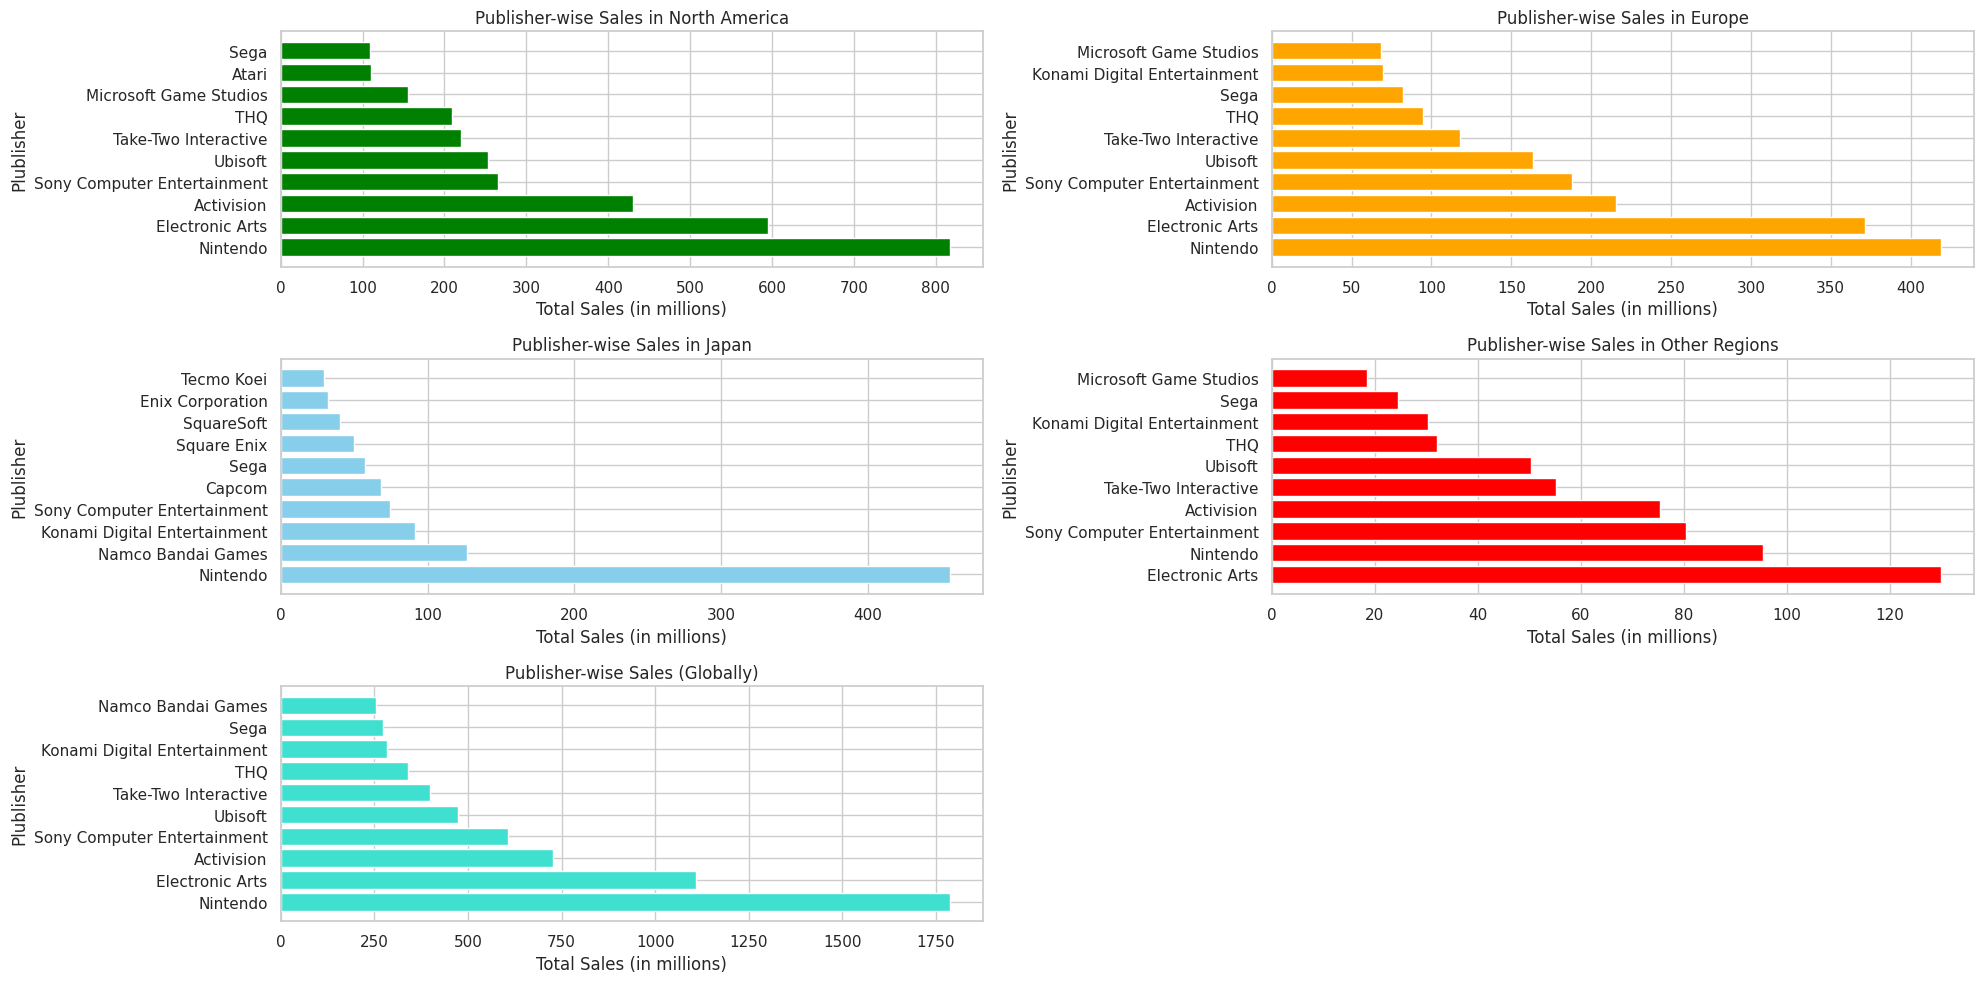

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
publishers = [top_10_publishers_na, top_10_publishers_eu, top_10_publishers_jp, top_10_publishers_or ,top_10_publishers_global]
titles = ['Publisher-wise Sales in North America', 'Publisher-wise Sales in Europe', 'Publisher-wise Sales in Japan', 'Publisher-wise Sales in Other Regions','Publisher-wise Sales (Globally)']
colors = ['green', 'orange','skyblue' ,'red' ,'turquoise']
axs = axs.flatten()
for i, sub in enumerate(publishers):
    axs[i].barh(sub.iloc[:,0], sub.iloc[:,1], color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Total Sales (in millions)')
    axs[i].set_ylabel('Plublisher')
fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

## **Insights:**

### Key Insights from Platform-wise Sales Charts

#### North America:
- **Top Platforms**: Xbox 360 (~600 million), PS2, Wii.
- **Observation**: Xbox 360 is the most popular.

#### Europe:
- **Top Platforms**: PS3 (~350 million), PS2, X360.
- **Observation**: PS3 dominates the market.

#### Japan:
- **Top Platforms**: DS (~175 million), PS2, PS.
- **Observation**: Nintendo DS is extremely popular.

#### Other Regions:
- **Top Platforms**: PS2 (~200 million), PS3, X360.
- **Observation**: PS2 is the favorite.

#### Globally:
- **Top Platforms**: PS2 (~1250 million), X360, PS3.
- **Observation**: PS2 leads globally.

### Summary
- **Global Leaders**: PS2, X360, PS3.
- **Regional Preferences**:
  - **North America**: Xbox 360.
  - **Europe**: PS3.
  - **Japan**: DS.
  - **Other Regions**: PS2.
- **Overall Trend**: Sony's PlayStation series and Microsoft's Xbox 360 are highly successful globally.

# **Genre vs Sales**

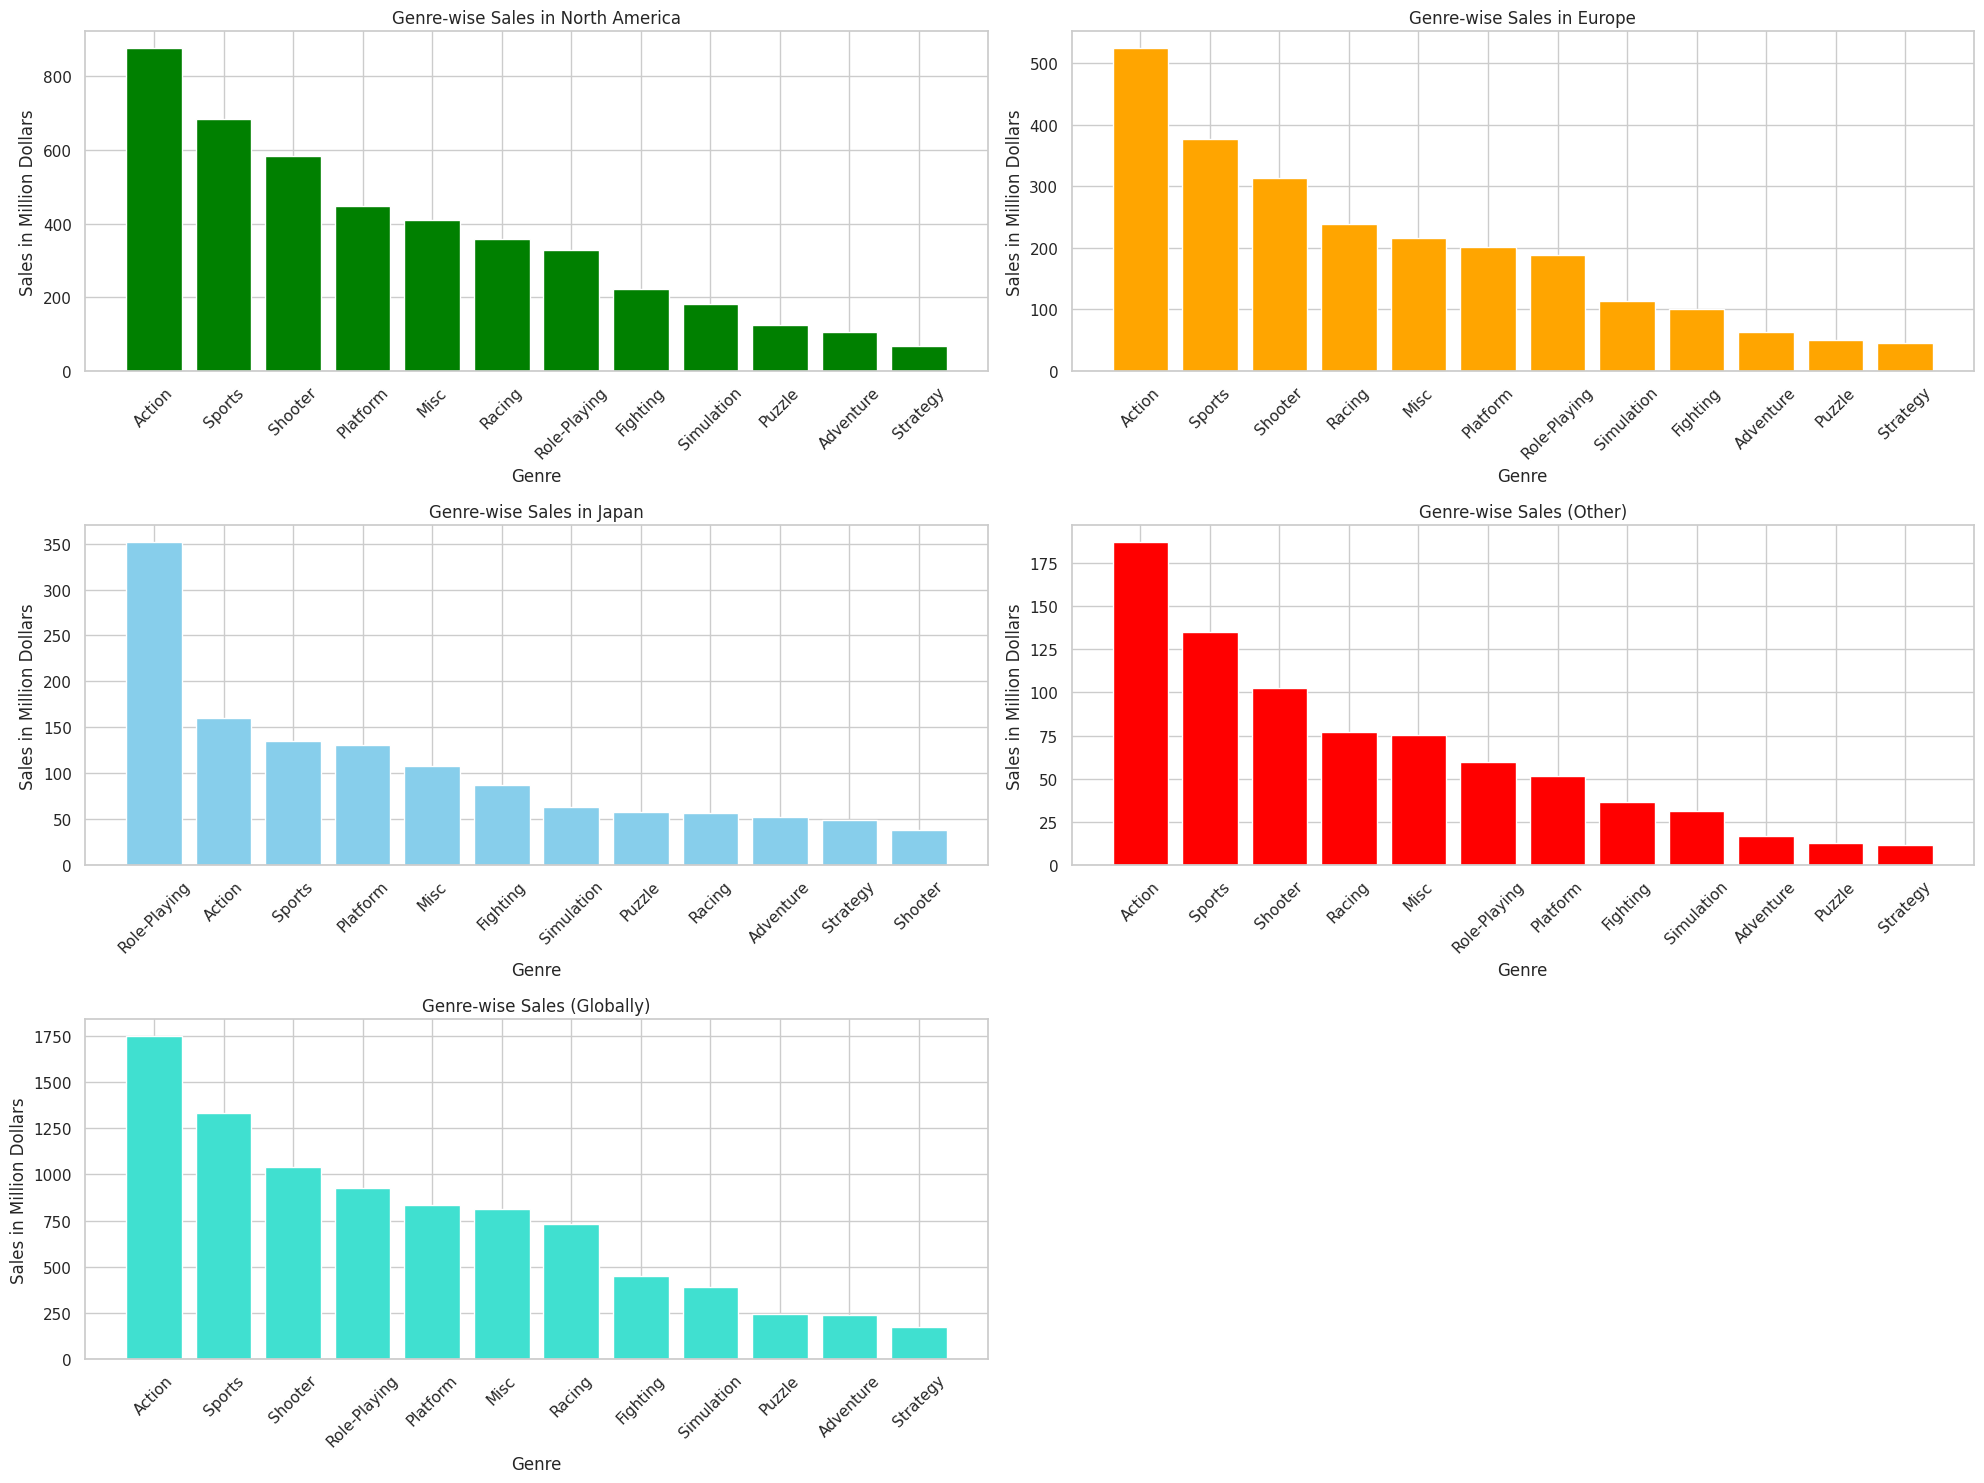

In [ ]:
# Group and sort data for each region
genre_sales_na = vgsales.groupby('Genre')['NA_Sales'].sum().reset_index().sort_values(by='NA_Sales', ascending=False)
genre_sales_eu = vgsales.groupby('Genre')['EU_Sales'].sum().reset_index().sort_values(by='EU_Sales', ascending=False)
genre_sales_jp = vgsales.groupby('Genre')['JP_Sales'].sum().reset_index().sort_values(by='JP_Sales', ascending=False)
genre_sales_other = vgsales.groupby('Genre')['Other_Sales'].sum().reset_index().sort_values(by='Other_Sales', ascending=False)
genre_sales_global = vgsales.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4)

# Titles and colors for each subplot
titles = ["Genre-wise Sales in North America", "Genre-wise Sales in Europe", "Genre-wise Sales in Japan", "Genre-wise Sales (Other)", "Genre-wise Sales (Globally)"]
colors = ['green', 'orange', 'skyblue', 'red', 'turquoise']

# Data and labels
sales_data = [genre_sales_na, genre_sales_eu, genre_sales_jp, genre_sales_other, genre_sales_global]
sales_labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Flatten axs for easy iteration
axs = axs.flatten()

# Plot each genre sales data
for i, ax in enumerate(axs[:-1]):  # Only plot the first 5 subplots, leaving the 6th empty
    ax.bar(sales_data[i]['Genre'], sales_data[i][sales_labels[i]], color=colors[i])
    ax.set_title(titles[i])
    ax.set_ylabel("Sales in Million Dollars")
    ax.set_xlabel("Genre")
    ax.tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


## **Insights:**

### Key Insights from Genre-wise Sales Charts

#### North America:
- **Top Genres**: Action (~800 million), Sports, Shooter.
- **Observation**: Action games dominate the market.

#### Europe:
- **Top Genres**: Action (~500 million), Sports, Shooter.
- **Observation**: Action and Sports games are the most popular.

#### Japan:
- **Top Genres**: Role-Playing (~350 million), Action, Sports.
- **Observation**: Role-Playing games are highly favored.

#### Other Regions:
- **Top Genres**: Action (~175 million), Sports, Shooter.
- **Observation**: Action games lead, followed by Sports.

#### Globally:
- **Top Genres**: Action (~1750 million), Sports, Shooter.
- **Observation**: Action games have the highest global sales.

### Summary
- **Global Leaders**: Action, Sports, and Shooter genres.
- **Regional Preferences**:
  - **North America**: Strong preference for Action and Shooter games.
  - **Europe**: Similar to North America with a preference for Action and Sports.
  - **Japan**: High preference for Role-Playing games.
  - **Other Regions**: Preference for Action and Sports games.
- **Overall Trend**: Action games are the most successful genre across all regions.

# **Games Vs Sales**

In [ ]:
#Global
games_sales_global = vgsales.groupby('Name')['Global_Sales'].sum().reset_index()
top_10_games_global = games_sales_global.sort_values(by='Global_Sales', ascending=False).head(10)
print(top_10_games_global)
#North America
games_sales_na = vgsales.groupby('Name')['NA_Sales'].sum().reset_index()
top_10_games_na = games_sales_na.sort_values(by='NA_Sales', ascending=False).head(10)
print(top_10_games_na)
#Europe
games_sales_eu = vgsales.groupby('Name')['EU_Sales'].sum().reset_index()
top_10_games_eu = games_sales_eu.sort_values(by='EU_Sales', ascending=False).head(10)
print(top_10_games_eu)
#japan
games_sales_jp = vgsales.groupby('Name')['JP_Sales'].sum().reset_index()
top_10_games_jp = games_sales_jp.sort_values(by='JP_Sales', ascending=False).head(10)
print(top_10_games_jp)
#Other Regions
games_sales_or = vgsales.groupby('Name')['Other_Sales'].sum().reset_index()
top_10_games_or = games_sales_or.sort_values(by='Other_Sales', ascending=False).head(10)
print(top_10_games_jp)

                                 Name  Global_Sales
11007                      Wii Sports         82.74
3712               Grand Theft Auto V         55.92
9327                Super Mario Bros.         45.31
9715                           Tetris         35.84
5573                   Mario Kart Wii         35.82
11009               Wii Sports Resort         33.00
7346         Pokemon Red/Pokemon Blue         31.37
1222          Call of Duty: Black Ops         31.03
1228   Call of Duty: Modern Warfare 3         30.83
6723            New Super Mario Bros.         30.01
                                 Name  NA_Sales
11007                      Wii Sports     41.49
9327                Super Mario Bros.     32.48
2590                        Duck Hunt     26.93
9715                           Tetris     26.17
3712               Grand Theft Auto V     23.46
1222          Call of Duty: Black Ops     17.59
9341                Super Mario World     15.99
5573                   Mario Kart Wii     15

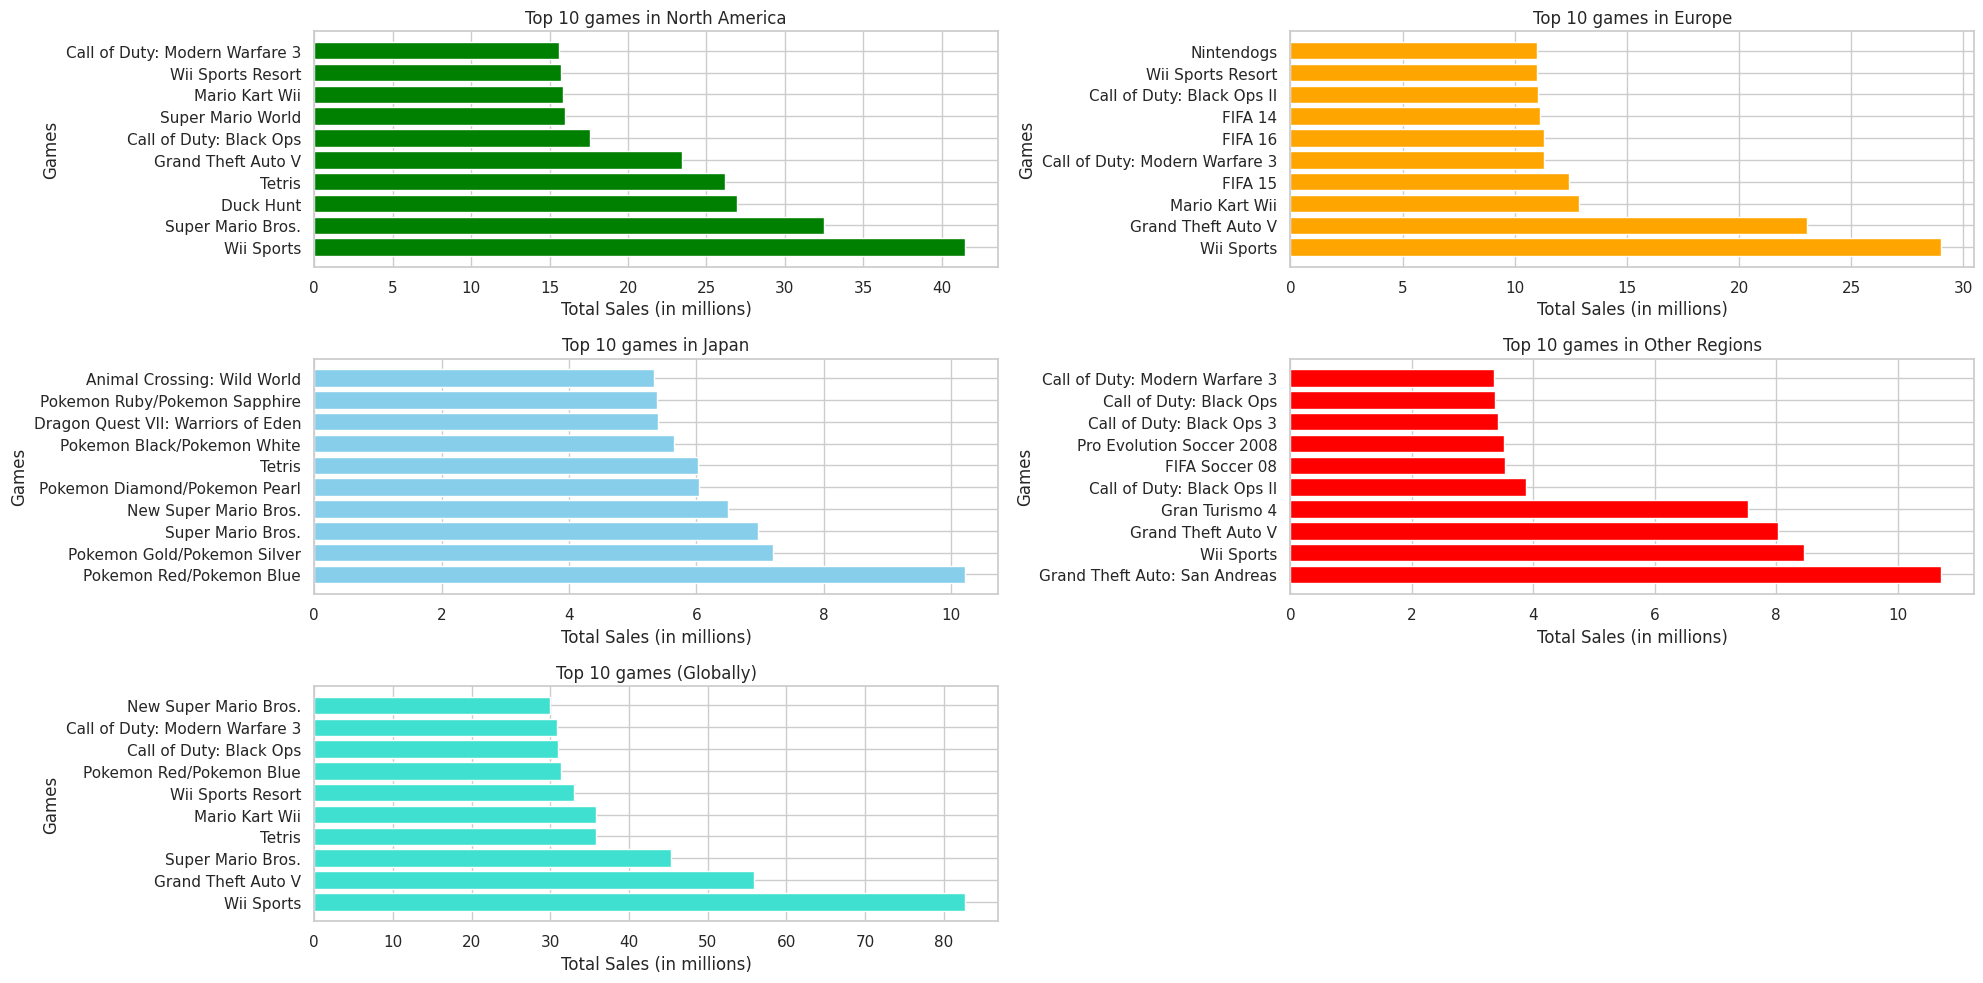

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
publishers = [top_10_games_na, top_10_games_eu, top_10_games_jp, top_10_games_or, top_10_games_global]
titles = ['Top 10 games in North America', 'Top 10 games in Europe', 'Top 10 games in Japan', 'Top 10 games in Other Regions', 'Top 10 games (Globally)']
colors = ['green','orange','skyblue','red','turquoise']
axs = axs.flatten()
for i, sub in enumerate(publishers):
    axs[i].barh(sub.iloc[:,0], sub.iloc[:,1], color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Total Sales (in millions)')
    axs[i].set_ylabel('Games')
fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

## **Insights:**

some key insights from the bar charts showing the top 10 video games by total sales in different regions:

### North America:
- **Top Game:** Wii Sports (~41 million sales)
- Other popular games include **Super Mario Bros.**, **Duck Hunt**, and **Tetris**, each with sales around 30 million.
- **Call of Duty** series (Modern Warfare 3, Black Ops) also features prominently.

### Europe:
- **Top Game:** Wii Sports (~30 million sales)
- **FIFA** series (FIFA 14, 15, 16) and **Call of Duty** series (Black Ops II, Modern Warfare 3) are highly popular.
- **Nintendogs** and **Mario Kart Wii** also have significant sales.

### Japan:
- **Top Game:** Pokémon Red/Blue (~10 million sales)
- Dominated by **Pokémon** games (including Ruby/Sapphire, Black/White) and classic titles like **Super Mario Bros.** and **Tetris**.
- **Animal Crossing: Wild World** also ranks high.

### Other Regions:
- **Top Game:** Grand Theft Auto: San Andreas (~10 million sales)
- **Call of Duty** series (Modern Warfare 3, Black Ops, Black Ops 3) and sports games like **FIFA Soccer 08** are popular.
- **Gran Turismo 4** and **Wii Sports** also have notable sales.

### Globally:
- **Top Game:** Wii Sports (~82 million sales)
- Other high-selling games include **Super Mario Bros.**, **Mario Kart Wii**, and **Tetris**, all with sales over 30 million.
- **Call of Duty** series and **Grand Theft Auto V** also have strong global sales.

### Overall Observations:
- **Wii Sports** is the best-selling game globally and in most regions.
- **Call of Duty** series and **Pokémon** games show significant popularity across multiple regions.
- Regional preferences vary, with sports games like **FIFA** dominating in Europe and classic titles like **Super Mario Bros.** and **Tetris** being consistently popular worldwide.